<div style="border:solid Chocolate 2px; padding: 40px">

<b>Владислава, привет!👋</b>

Меня зовут Ольга Бессолицына, тимлид, я буду проверять эту (как наверное и все) части твоего проекта. 

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Разведочный-анализ-(EDA)" data-toc-modified-id="Разведочный-анализ-(EDA)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разведочный анализ (EDA)</a></span></li><li><span><a href="#Отбор-признаков" data-toc-modified-id="Отбор-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Отбор признаков</a></span></li></ul></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Отчет" data-toc-modified-id="Отчет-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Отчет</a></span></li></ul></div>

# Прогнозирование оттока клиентов оператора связи «Ниединогоразрыва.ком»

**Заказчик** - оперотор связи «Ниединогоразрыва.ком»

**Цель:** построить модель, которая поможет предсказать уход клиента.
В случае предсказания ухода пользователя, ему будут предложены промокоды и специальные условия.

**Оператор предоставляет следующие услуги:**

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).
3. Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
4. Выделенная линия технической поддержки (*TechSupport*);
5. Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
6. Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

**Типы оплаты договора:**
1. оплата производится каждый месяц
2. заключить договор на 1–2 года

**Описание полей данных:**
- BeginDate – дата начала пользования услугами,
- EndDate – дата окончания пользования услугами,
- Type – тип договора: ежемесячный, годовой и т.д,
- PaperlessBilling – факт выставления счёта на электронную почту,
- PaymentMethod – способ оплаты,
- MonthlyCharges – ежемесячные траты на услуги,
- TotalCharges – всего потрачено денег на услуги,
- Dependents – наличие иждивенцев,
- Senior Citizen – наличие пенсионного статуса по возрасту,
- Partner – наличие супруга(и),
- MultipleLines – наличие возможности ведения параллельных линий во время звонка.

**Информация о договорах актуальна на 1 февраля 2020**


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
 Молодец, что не забываешь про заголовок и описание, это важно, так и самому удобнее работать, когда они всегда на виду, так и другим будет проще понять, что происходит в твоей тетради :)
</div>

## Исследование данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import skim, clean_columns
from phik.report import correlation_report, plot_correlation_matrix

from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve, roc_auc_score,accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import roc_auc_score

RANDOM_STATE = 270323

In [2]:
try:
    contract = pd.read_csv('C:\\Users\\79879\\Desktop\\финальный проект\\final_provider\\final_provider\\contract.csv')
    personal = pd.read_csv('C:\\Users\\79879\\Desktop\\финальный проект\\final_provider\\final_provider\\personal.csv')
    internet = pd.read_csv('C:\\Users\\79879\\Desktop\\финальный проект\\final_provider\\final_provider\\internet.csv')
    phone = pd.read_csv('C:\\Users\\79879\\Desktop\\финальный проект\\final_provider\\final_provider\\phone.csv')
except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> ошибка загрузки файлов, указаны только локальные пути. Рекомендую использовать конструкцию try-except

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> добавила, обычно в этой конструкции я использовала ссылку на файл, а тут zip и я не поняла, как это осуществить, надеюсь сейчас правильно.
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> теперь верно, доработано

In [3]:
def information (data):
    display(data.sample(5))
    print('\033[1m'+'Общая информация о данных:'+'\033[0m','\n')
    print(data.info(),'\n')
    print('\033[1m'+'Наличие пропусков в данных:'+'\033[0m','\n')
    print(data.isna().sum(),'\n')
    print('\033[1m'+'Наличие явных дубликатов:'+'\033[0m','\n')
    print(data.duplicated().sum(),'\n')
    print('\033[1m'+'Описательная статистика'+'\033[0m','\n')
    display(data.describe(include='all').T)

In [4]:
information(contract)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2141,6648-INWPS,2018-10-01,No,Month-to-month,No,Electronic check,20.15,341.35
5801,8695-ARGXZ,2017-04-01,No,Month-to-month,Yes,Electronic check,75.55,2425.4
2785,4016-BJKTZ,2018-01-01,No,Two year,No,Electronic check,108.90,2809.05
149,3466-BYAVD,2018-11-01,No,Month-to-month,Yes,Mailed check,69.50,1071.4
6359,7148-XZPHA,2015-07-01,No,Month-to-month,No,Electronic check,79.40,4238.45


Общая информация о данных: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None 

Наличие пропусков в данных: 

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64 

Наличие явных дубликатов: 

0 

Описательная статистика 



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BeginDate,7043,77,2014-02-01,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EndDate,7043,5,No,5174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,7043,3,Month-to-month,3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,7043,2,Yes,4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,7043,4,Electronic check,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,7043.0,NaN,NaN,NaN,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
TotalCharges,7043,6531,,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


На первый взгляд в данных нет пропусков и явных дубликатов.\
Необходимо менять тип данных в столбцах BeginDate и EndDate на datetime, а так же TotalCharges на float64.\
В MonthlyCharges нет нулевых данных, и так же судя по 75% квантилю и max нет выбросов.\
По данным EndDate сразу можно заметить несбалансированность, так как из 7043 записей 5174 со значением No.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, с выводом согласна, явных пропусков нет

In [5]:
information(personal)

,customerID,gender,SeniorCitizen,Partner,Dependents
30,3841-NFECX,Female,1,Yes,No
3760,8617-ENBDS,Male,0,No,No
1790,3096-IZETN,Female,0,No,No
4032,4098-NAUKP,Male,1,Yes,Yes
313,2799-ARNLO,Female,1,Yes,No


Общая информация о данных: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None 

Наличие пропусков в данных: 

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64 

Наличие явных дубликатов: 

0 

Описательная статистика 



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Распределение признака SeniorCitizen')

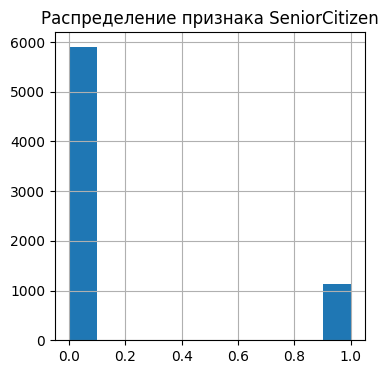

In [6]:
plt.figure(figsize=(4, 4))
personal['SeniorCitizen'].hist()
plt.title('Распределение признака SeniorCitizen')

Пропусков и явных дубликатов нет.\
С типами данных все впорядке.\
Соотношение мужчин и женщин примерно одинаковое.\
Пенсионеров в 6 раз меньше людей не пенсионного возраста.\
Число записей соответсвует количеству записей в таблице contract.


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично

In [7]:
information(internet)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
3385,5325-UWTWJ,Fiber optic,Yes,Yes,No,Yes,No,No
3063,3871-IKPYH,Fiber optic,No,No,No,No,No,No
2983,3620-MWJNE,DSL,Yes,No,No,Yes,No,No
3849,2055-BFOCC,DSL,Yes,Yes,Yes,Yes,Yes,Yes
2931,4806-HIPDW,Fiber optic,No,No,No,No,No,No


Общая информация о данных: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None 

Наличие пропусков в данных: 

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64 

Наличие явных дубликатов: 

0 

Описательная статистика 



,count,unique,top,freq
customerID,5517,5517,7590-VHVEG,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785


Пропусков и явных дубликатов нет.\
Тип данных соответсвует содержимому.\
Число записей в данных меньше, чем в первых двух таблицах, вероятно это связано с тем,что не все пользователи используют услугу интернет и ее дополнительные опции.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо

In [8]:
information(phone)

,customerID,MultipleLines
579,4580-TMHJU,No
1075,4660-IRIBM,No
3857,2683-BPJSO,Yes
6250,7142-HVGBG,Yes
200,6341-JVQGF,No


Общая информация о данных: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None 

Наличие пропусков в данных: 

customerID       0
MultipleLines    0
dtype: int64 

Наличие явных дубликатов: 

0 

Описательная статистика 



,count,unique,top,freq
customerID,6361,6361,5575-GNVDE,1
MultipleLines,6361,2,No,3390


Пропусков и явных дубликатов нет.\
Тип данных соответвует содержимому.\
Число строк меньше,чем в contract, опять же не все пользователи пользуются услугой телефонии.


Так же во всех таблицах необходимо привести наименование колонок в формат snake_case.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, первичный анализ проведен.
    
----
    
для snake_case есть неплохая библиотека для выполнения  рутинных операций в пандасе - https://pypi.org/project/skimpy/. Там же есть функция clean_column() котороая в одно действие выполняет приведение названий колонок к соответствующему виду.
       
Рекомендую ознакомиться.

**Вопросы:**
1. При добавлении фичи продолжительность договора, как быть с договорами, которые еще действуют?на какое значение заменять?
2. Были обнаружены пропуски в TotalCharges всего 11 штук, я правильно понимаю,что вычислить мы их не можем,поэтому просто удаляем?
3. Нужно ли тип object переводить в category или это все решается кодированием?

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
1) для действующих клиентов считаем от даты среза данных

2) верно, можно удалить. Можно также посмотреть, что это новые клиенты, которые только пришли и вероятно их платеж просто не попал в базу, поэтому можно приравнять их общий платеж и ежемесячному
    
3) все зависит от выбранных моделей и способа кодирования категориальных признаков. У lgbm и catboost рекомендуется переводить, если используется встроенный кодировщик и аргументы categorical_feature и cat_features соответсвнно.

**План:**
1. Превести колонки в нужный вид, изменить тип данных в столбцах BeginDate и EndDate на datetime, а так же TotalCharges на float64.
2. Добавить:
   * целевой признак из EndDate, где No-0, дата окончания договора-1
   * продолжительность действия договора в месяцах
   * общее количество дополнительных опций, используемых каждым пользователем.
3. Объеденить нужные столбцы из 4 таблиц с помощью метода merge по столбцу customerID, how="outer" , обработать образовавшиеся пропуски.
4. Проанализировать и постороить графики Type, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, SeniorCitizen, 	Partner	Dependents, InternetService, общее количество дополнительных услуг, MultipleLines в разрезе целевого признака.В ходе анализа составить портрет уходящего клиента. 
5. Определить наименее важные признаки и провести проверку на мультиколлениарность.
6. Разбить данные на train и test = 0.25  с учетом дисбаланса используем stratify.
7. Подобрать гиперпараметры и обучить следующие модели: LogisticRegression, CatBoostClassifier, RandomForestClassifier с указанием class_weight='balanced'. Выбрать наилучшую модель по метрике roc_auc. Дополнительно посчитать f1 и accuracy, построить матрицу ошибок и интерпритировать полученные данные.
8. Провести тестирование лучшей модели на тестовом наборе , достичь значение метрики roc_auc>=0.85.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично, план принят, можно начинать его реализацию

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Владислава</b>, работа почти готова, но нужно дорабоать загрузку данных, мои комментарии ты увидишь выше.

Жду твою работу! :)

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>✔️ Заключение тимлида 2: <a class="tocSkip"> </h2> 
    
<b>Владислава</b>, доработки приняты, можно приступать ко второй части:) Обрати внимание, что для следующей части нужно загрузить уже сделанную часть проекта со всеми комментариями и после этого продолжить писать работу. В итоге у нас получиться большой блокнот со всей историей проекта.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Владислава, привет! Начинаю проверять с этой ячейки кода, версии комментариев обнуляю

## Предобработка данных

In [9]:
# Приведение названий колонок к соответствующему виду

contract = clean_columns(contract)
personal = clean_columns(personal)
internet = clean_columns(internet)
phone = clean_columns(phone)
print(contract.columns)
print(personal.columns)
print(internet.columns)
print(phone.columns)

8 column names have been cleaned

4 column names have been cleaned

8 column names have been cleaned

2 column names have been cleaned

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')
Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')
Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')
Index(['customer_id', 'multiple_lines'], dtype='object')


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично

In [10]:
# Создание целевого признака из колонки contract['end_date']

contract['customer_outflow'] = np.where(contract['end_date']=='No', 0, 1)
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_outflow
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> таргет выделен верно

In [11]:
# Заменяю в end_date 'No' на '2020-02-01' 

contract['end_date']=contract['end_date'].replace('No','2020-02-01')
contract['end_date'].unique()

array(['2020-02-01', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

На данном этапе уже видно, что контракты разрывали только в 2019 и 2020 году, нужно будет рассмотреть детальнее этот момент.

In [12]:
# В total_charges были обнаружены пустые строки, посмотрим на них 

contract[contract['total_charges']==' ']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_outflow
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,0


11 записей, в которых дата заключения договора совпадает с датой выгрузки данных. Клиенты только пришли,вероятно их платеж не попал в базу,приравняю их общий платеж к ежемесячному

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>согласна

In [13]:
ind_list = contract.index [contract['total_charges']== ' ' ].tolist ()
ind_list

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [14]:
contract.loc[contract['total_charges']==' ','total_charges']=contract.loc[contract['total_charges']==' ']['monthly_charges']

In [15]:
#Проверяем корректность заполнения данных
contract.loc[ind_list]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_outflow
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,52.55,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,20.25,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,80.85,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,25.75,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,56.05,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,19.85,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,25.35,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,20.0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,19.7,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,73.35,0


In [16]:
#Меняем тип данных 

contract['begin_date'] = contract['begin_date'].astype('datetime64')
contract['end_date'] = contract['end_date'].astype('datetime64')
contract['total_charges'] = contract['total_charges'].astype('float64')
contract.dtypes

customer_id                  object
begin_date           datetime64[ns]
end_date             datetime64[ns]
type                         object
paperless_billing            object
payment_method               object
monthly_charges             float64
total_charges               float64
customer_outflow              int32
dtype: object

In [17]:
# Создание признаков
#продолжительности действия договора в днях
contract['duration'] = round((contract['end_date']-contract['begin_date'])/ np.timedelta64 ( 1 , 'D'))

# год начала договора
contract['year_begin'] = contract['begin_date'].dt.year

# год окончания договора
contract['year_end'] = contract['end_date'].dt.year

contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_outflow,duration,year_begin,year_end
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31.0,2020,2020
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036.0,2017,2020
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61.0,2019,2019
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371.0,2016,2020
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61.0,2019,2019


In [18]:
# Создадим признак общего количества используемых дополнительных опций у пользователей интернета

col_list= list(internet)
col_list.remove('internet_service')
col_list.remove('customer_id')

internet[col_list] = np.where((internet[col_list] == 'Yes'), 1, 0)

internet['services_used'] = internet[col_list].sum(axis=1)
internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,services_used
0,7590-VHVEG,DSL,0,1,0,0,0,0,1
1,5575-GNVDE,DSL,1,0,1,0,0,0,2
2,3668-QPYBK,DSL,1,1,0,0,0,0,2
3,7795-CFOCW,DSL,1,0,1,1,0,0,3
4,9237-HQITU,Fiber optic,0,0,0,0,0,0,0


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> есть новые синтетические признаки

In [19]:
#Удалим более не нужные признаки из таблицы contract

contract = contract.drop(['begin_date','end_date'],axis=1)

In [20]:
# Объединение contract,personal,internet и phone

df = contract.merge(personal,how='left',on='customer_id')
df = df.merge(internet,how='left',on='customer_id')
df = df.merge(phone,how='left',on='customer_id')

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> датасет собран верно

In [21]:
df.isna().sum()

customer_id             0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
customer_outflow        0
duration                0
year_begin              0
year_end                0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
services_used        1526
multiple_lines        682
dtype: int64

In [22]:
df.shape

(7043, 23)

В результате присоединения таблиц internet и phone, где число строк было меньше ,так как не все пользователи пользуются одновременно услугами интернет и телефония,появились пропуски.\
Заменим их в internet_service на 'not used',соответственно в services_used и в дополнительных услугах число используемых доп.опций будет равно 0. \
В multiple_lines заменим так же на 'not used'

In [23]:
df['internet_service'] = df['internet_service'].fillna('not used')
df['services_used'] = df['services_used'].fillna(0)

df[['online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']] =\
df[['online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']].fillna(0)

df['multiple_lines'] = df['multiple_lines'].fillna('not used')

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хороший вариант заполнения пропусков

In [24]:
df.isna().sum()

customer_id          0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
customer_outflow     0
duration             0
year_begin           0
year_end             0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
services_used        0
multiple_lines       0
dtype: int64

In [25]:
# Проверим нет ли в данных, после объединения, клиентов,которые не используют ни одной услуги

df.loc[(df['internet_service']=='not used')&(df['multiple_lines']=='not used')]

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_outflow,duration,year_begin,year_end,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,services_used,multiple_lines


In [26]:
df.sample(3)

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_outflow,duration,year_begin,year_end,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,services_used,multiple_lines
3594,9026-LHEVG,Month-to-month,No,Electronic check,40.75,359.40,0,276.0,2019,2020,...,No,DSL,0.0,1.0,0.0,0.0,0.0,1.0,2.0,not used
6673,3798-EPWRR,Month-to-month,No,Electronic check,43.95,85.10,0,62.0,2019,2020,...,No,DSL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3127,1432-FPAXX,Month-to-month,Yes,Electronic check,30.60,856.35,1,883.0,2017,2019,...,No,DSL,0.0,1.0,0.0,0.0,0.0,0.0,1.0,not used


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   customer_outflow   7043 non-null   int32  
 7   duration           7043 non-null   float64
 8   year_begin         7043 non-null   int64  
 9   year_end           7043 non-null   int64  
 10  gender             7043 non-null   object 
 11  senior_citizen     7043 non-null   int64  
 12  partner            7043 non-null   object 
 13  dependents         7043 non-null   object 
 14  internet_service   7043 non-null   object 
 15  online_security    7043 non-null   float64
 16  online_backup      7043 

После предобработки, данные не потеряны. Записей,где пользователь не пользуется ни одной из двух услуг нет.\
В результате имеем 23 признак и 7043 объекта.

In [28]:
# Заменим тип данных

df['senior_citizen'] = df['senior_citizen'].astype('int')
df['services_used'] = df['services_used'].astype('int')
df[['duration','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']]=\
df[['duration','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']].astype('int')


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично, есть предобработка

### Разведочный анализ (EDA)

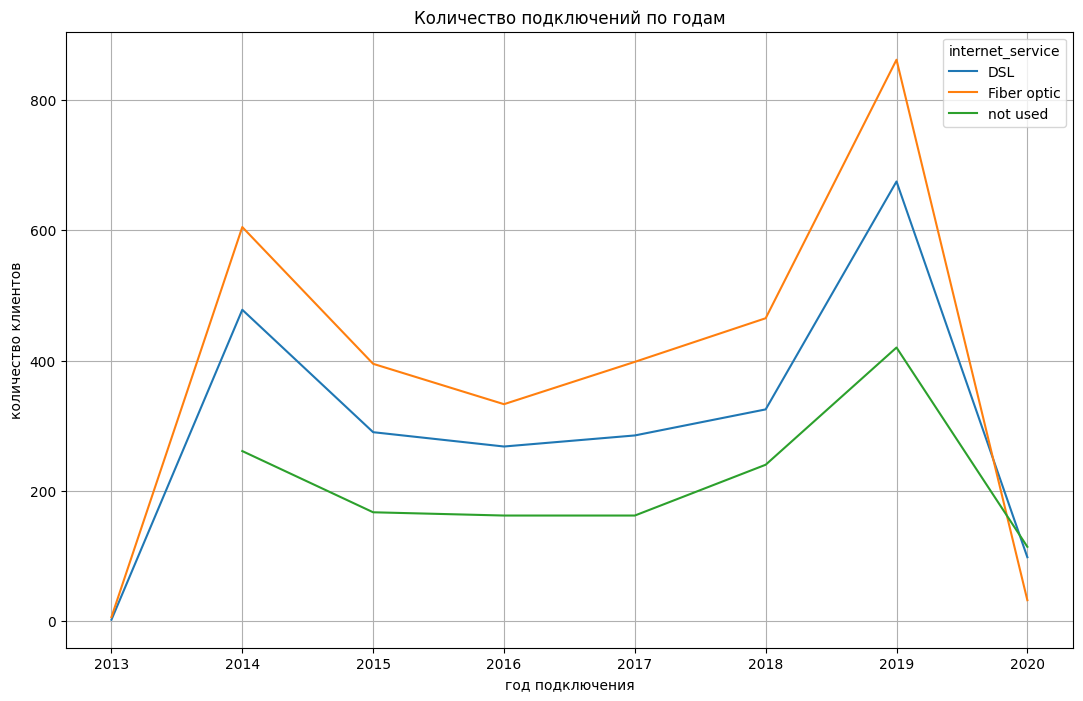

In [29]:
# Посмотрим на распределение количества подключений по годам и типу internet_service
df.pivot_table(index=['year_begin'],columns=['internet_service'],values='customer_id',aggfunc='count').plot(grid=True,
                                    figsize=(13,8))
plt.title('Количество подключений по годам')
plt.ylabel('количество клиентов')
plt.xlabel('год подключения')
plt.show()

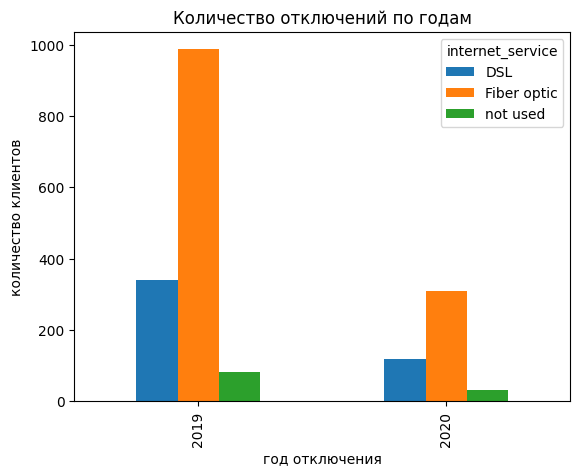

In [30]:
# Посмотрим на количества отключений по годам и типу internet_service
df.loc[df['customer_outflow']==1].\
pivot_table(index=['year_end'],columns=['internet_service'],values='customer_id',aggfunc='count').plot(kind='bar')
plt.title('Количество отключений по годам')
plt.ylabel('количество клиентов')
plt.xlabel('год отключения')
plt.show()

Как видим, заключение договоров в данных начинается с 2013 года, а первые отключения начинаются только в 2019 году.\
Резкий скачок по увеличению клиентов был сначала в 2014 году, после чего  до 2018 года держался практически на одном уровне.\
С 2018 начинается приток клиентов и пик приходится на 2019 год. Так же на 2019 год приходится и пик расторжения договоров. \
Большее число подключений и отключений пришлось на оптоволокно.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошие визуализации, отлично

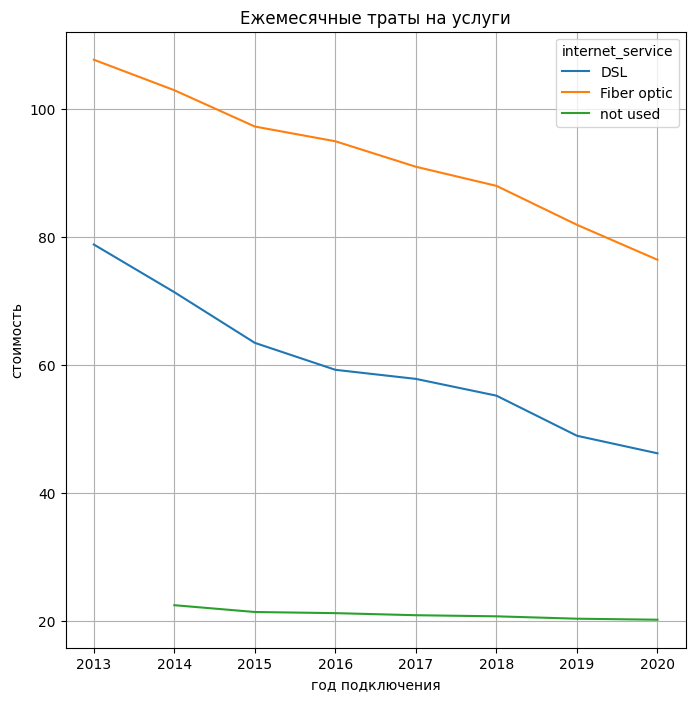

In [31]:
# Посмотрим как изменялась месячная стоимость услуг, не связано ли массовость прихода-ухода с ней

df.pivot_table(index=['year_begin'],columns=['internet_service'],values='monthly_charges',aggfunc='mean').plot(grid=True,
                                    figsize=(8,8))
plt.title('Ежемесячные траты на услуги')
plt.ylabel('стоимость')
plt.xlabel('год подключения')
plt.show()

Повышения цен не было, начиная с 2013 года стоимость услуг снижалась.Дороже всего клиентам обходится подключение на оптоволокно, услуги на DSL стоят гораздо дешевле.Ну и клиенты, использующие только телефонию платят меньше всех.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> вполне логично

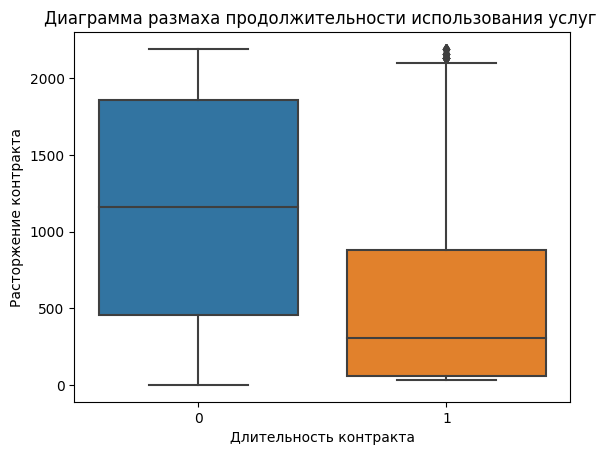

In [32]:
# Посмотрим на диаграмму размаха продолжительности использования услуг, поскольку с 2013 по 2019 год отключений не наблюдалось.

sns.boxplot(data=df, y='duration', x='customer_outflow')
plt.title('Диаграмма размаха продолжительности использования услуг ')
plt.ylabel('Расторжение контракта')
plt.xlabel('Длительность контракта')
plt.show()

In [33]:
# Удалим выбросы в отключениях
ind_list_drop = df.query(' customer_outflow==1 & duration >=1500 ').index.tolist()
print(len(ind_list_drop))
df = df.drop (index=ind_list_drop)

198


In [34]:
df.shape

(6845, 23)

Рассмотрим признаки в разрезе расторжения договора

In [35]:
def count_plot(feature_1,feature_2):
    plt.figure(figsize=(8,8))
    sns.catplot(x = feature_1, hue = 'customer_outflow',col = feature_2,kind = 'count', data = df)

<Figure size 800x800 with 0 Axes>

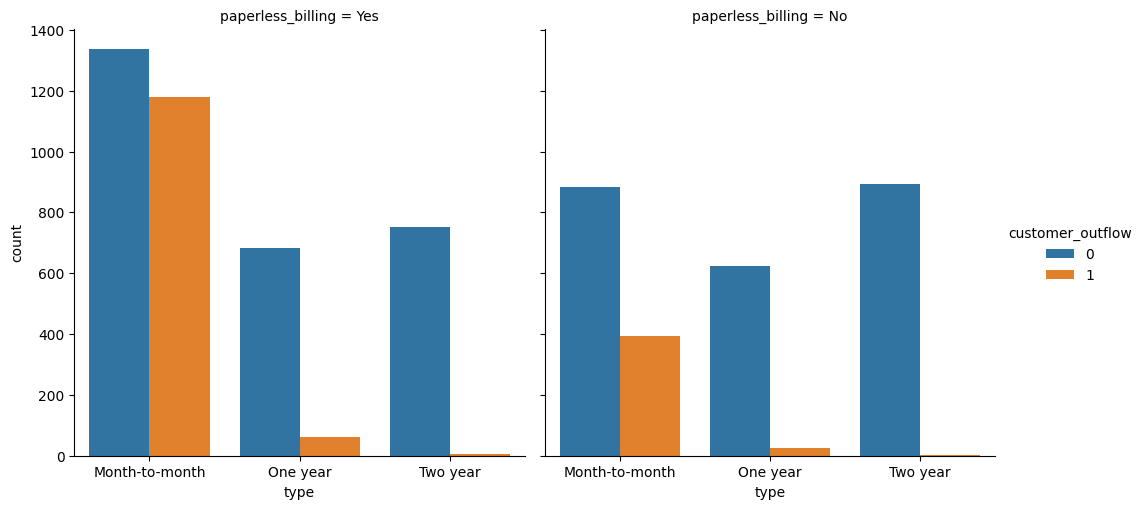

In [36]:
count_plot('type','paperless_billing')

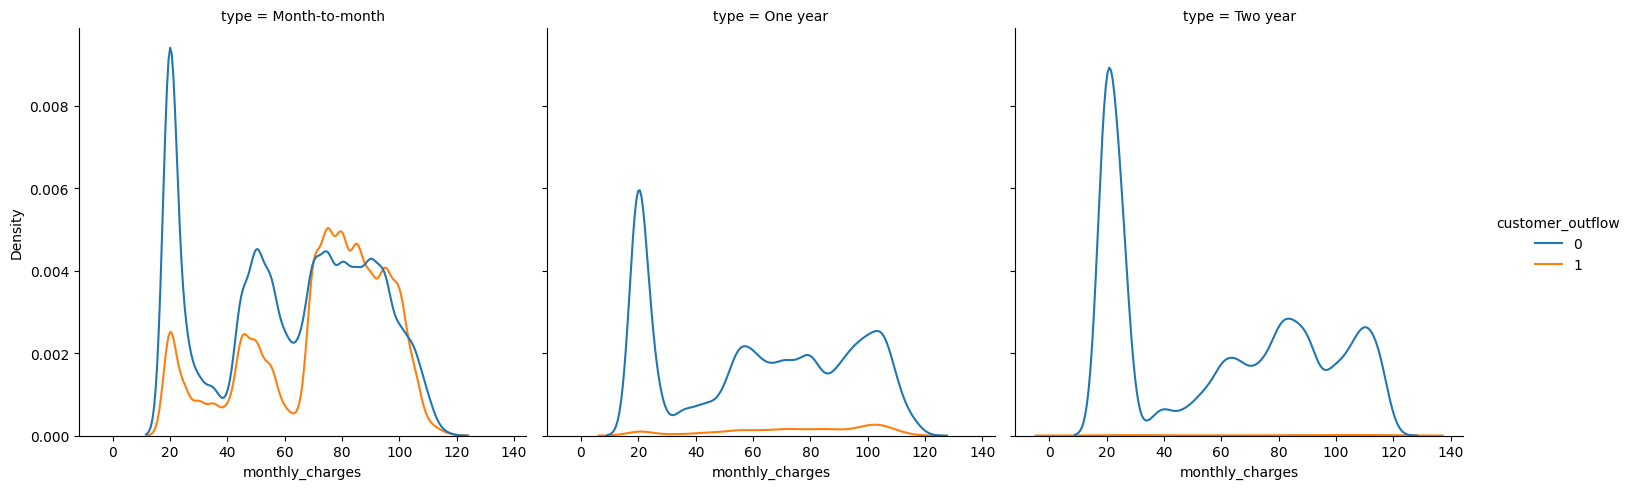

In [37]:
sns.displot(x="monthly_charges",
            col="type",
            hue='customer_outflow',
            kind="kde",
            bw_adjust=0.4,
            data=df);

Клиенты с помесячным типом оплаты расторгают договор, чаще чем с договором на 1-2 года.При чем клиенты,которым приходил счет на электронную почту делают это чаще, чем те кому счет не выставляют по почте.\
Так же клиенты, платившие за месяц более 65 у.е., за год-два более 100 у.е. уходят чаще.Что логично, уходят те,кто тратит много.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, возможно у долгосрочных клиентов есть какие-то скидки или пониженый тариф

<Figure size 800x800 with 0 Axes>

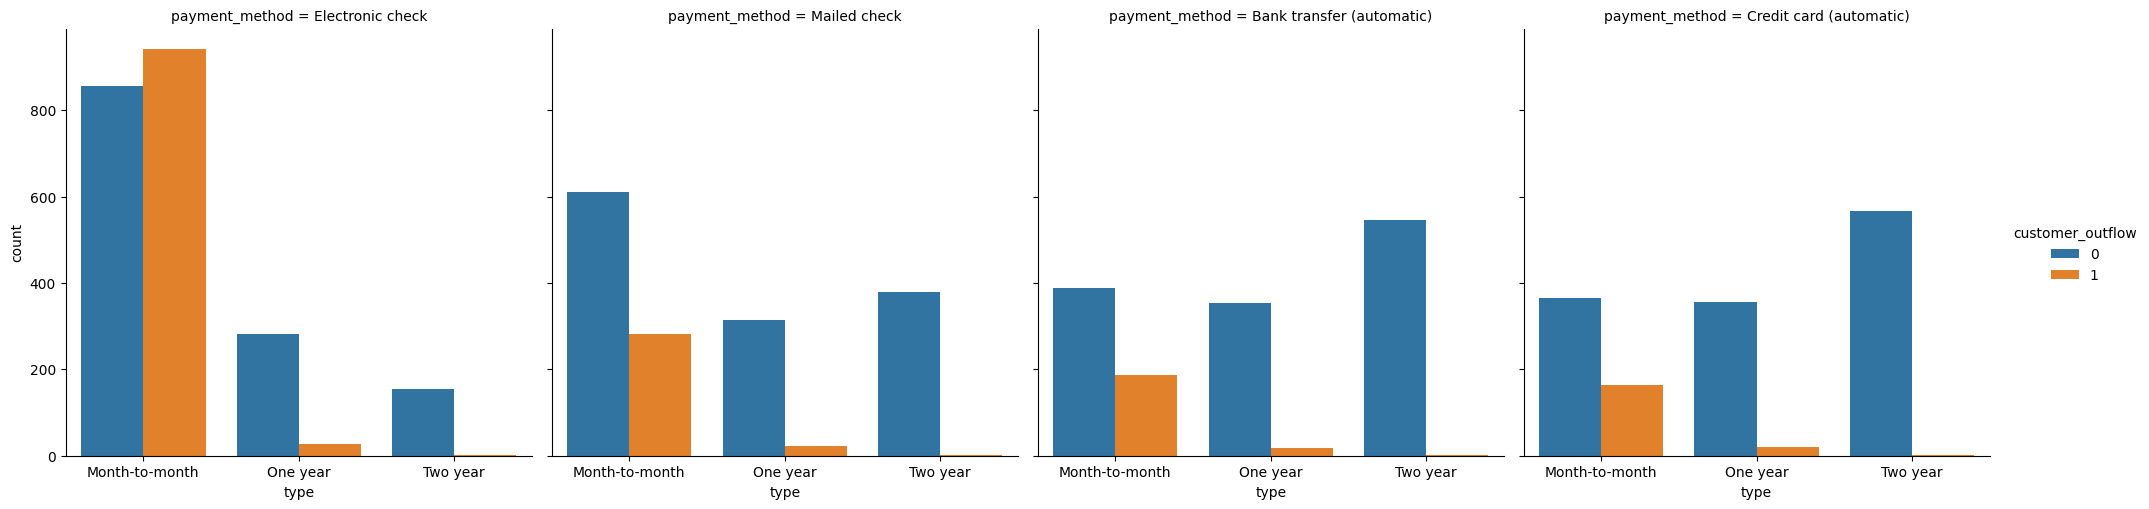

In [38]:
count_plot('type','payment_method')

Число ушедших клиентов с помесячной оплатой и электронным чеком превышает число действующих клиентов  с такой же формой оплаты. В остальном так же прослеживается тенденция того,что независомо от способа оплаты клиенты с месячной формой платежей уходят чаще.

Text(0.5, 1.0, 'Распределение общих затрат на услуги')

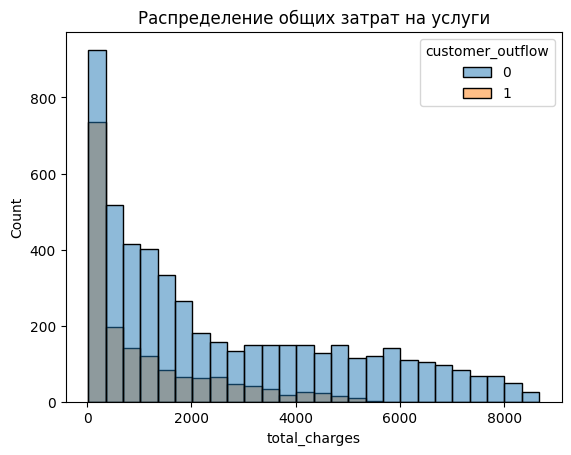

In [39]:
sns.histplot(x = 'total_charges', hue = 'customer_outflow', data = df,alpha=0.5)
plt.title('Распределение общих затрат на услуги')

Чем выше общая сумма платежей, тем меньше ушедших клиентов, что связано видимо с типом оплаты 1-2 года,большая часть клиентов уходит в общем заплатив сумму в диапазоне 400-500 у.е.,вероятно это как раз клиенты с месячной формой оплаты.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо

<AxesSubplot:xlabel='duration', ylabel='Count'>

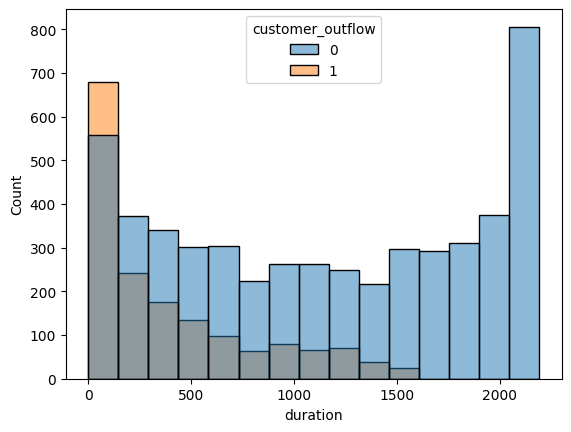

In [40]:
sns.histplot(x = 'duration', hue = 'customer_outflow', data = df,alpha=0.5)

Чаще уходят клиенты, пользующиеся услугами в пределах 5-6 месяцев.

<Figure size 800x800 with 0 Axes>

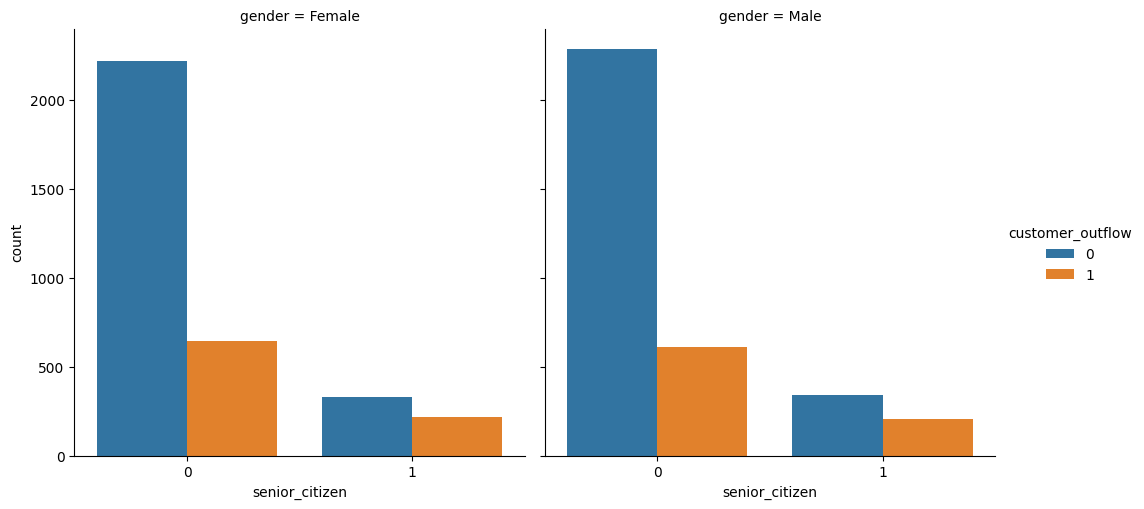

In [41]:
count_plot('senior_citizen','gender')

Нет зависимости от пола,этот признак можно будет исключить.\
Люди пенсионного возраста расторгают договор чаще.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> согласна, но стоит проверить корреляции перед удлаением признака

<Figure size 800x800 with 0 Axes>

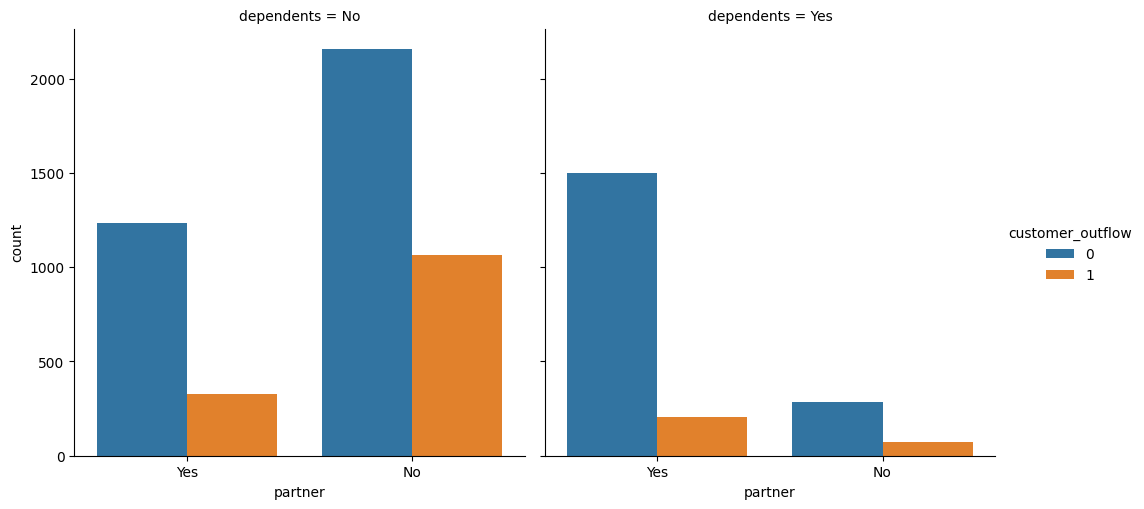

In [42]:
count_plot('partner','dependents')

Среди клиентов без детей и без супруга уходят чаще остальных.

<Figure size 800x800 with 0 Axes>

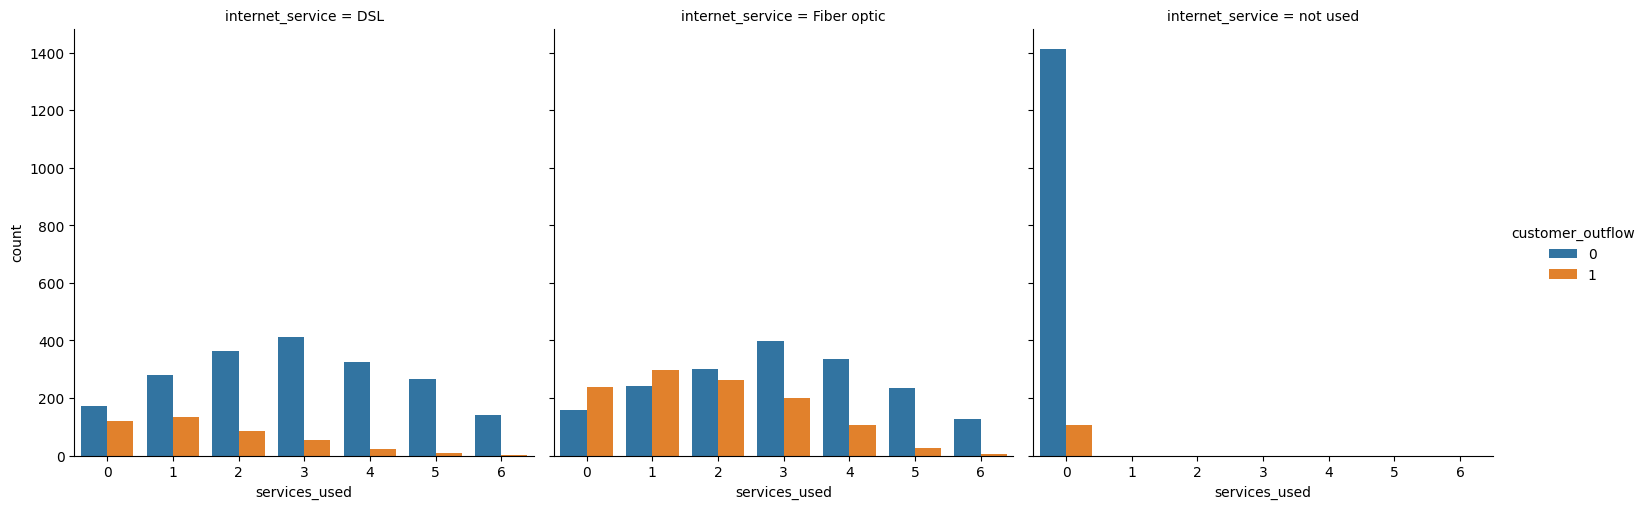

In [43]:
count_plot('services_used','internet_service')

Клиенты, использующие подключение через оптоволокно,намного чаще покидают компанию, в отличие от использующих DSL.Вероятно это связано с тем, что услуги на оптоволокне дороже и видимо качество не лучшее.\
Клиенты не использующие интернет предпочитают оставаться клиентами компании.\
Среди клиентов DSL довольно часто уходят не использующие дополнительные услугисвообще или использующие 1 услугу.\
А клиенты на оптоволокне только в случае подключения 5-6 дополнительных опций остаются в компании.В остальных случаях чаще покидают.Что странно поскольку подключение DSL это прошлый век, вероятно у компании проблемы с оптоволокном.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошее наблюдение, бизнесу будет полезно увидеть такую статистику

Text(0.5, 1.0, 'Распределение договоров в зависомости от multiple_lines')

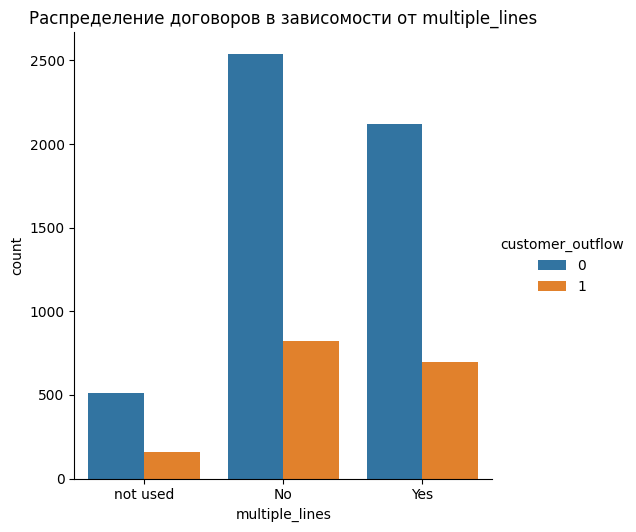

In [44]:
sns.catplot(x = 'multiple_lines', hue = 'customer_outflow',kind = 'count', data = df)
plt.title('Распределение договоров в зависомости от multiple_lines')

Возможность ведения параллельных линий во время звонка не сильно влияет на решение об уходе.Данный признак можно исключить. 

По результатам исследования данных, был составлен следующий\
**ПОРТРЕТ УХОДЯЩЕГО КЛИЕНТА:**
*  Без супруга(и) и без детей
*  Использует подключение Fiber optic (оптоволокно)
*  Тип контракта month-to-month с ежемесячной стоимостью более 65 у.е.
*  Выставление счета на электронную почту с электронным чеком
*  Договор заключен 5-6 месяцев назад
*  Количество дополнительных интернет услуг 0-3
 

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> супер! отличная аналитическая работа, молодец

### Отбор признаков

In [45]:
# Удалим признаки не влияющие на целевой, которые были обнаружены в результате исследования
df.drop(['customer_id','gender','year_end','multiple_lines'],axis=1,inplace=True)

In [46]:
df.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_outflow,duration,year_begin,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,services_used
0,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,2020,0,Yes,No,DSL,0,1,0,0,0,0,1
1,One year,No,Mailed check,56.95,1889.50,0,1036,2017,0,No,No,DSL,1,0,1,0,0,0,2
2,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,2019,0,No,No,DSL,1,1,0,0,0,0,2
3,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,2016,0,No,No,DSL,1,0,1,1,0,0,3
4,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,2019,0,No,No,Fiber optic,0,0,0,0,0,0,0


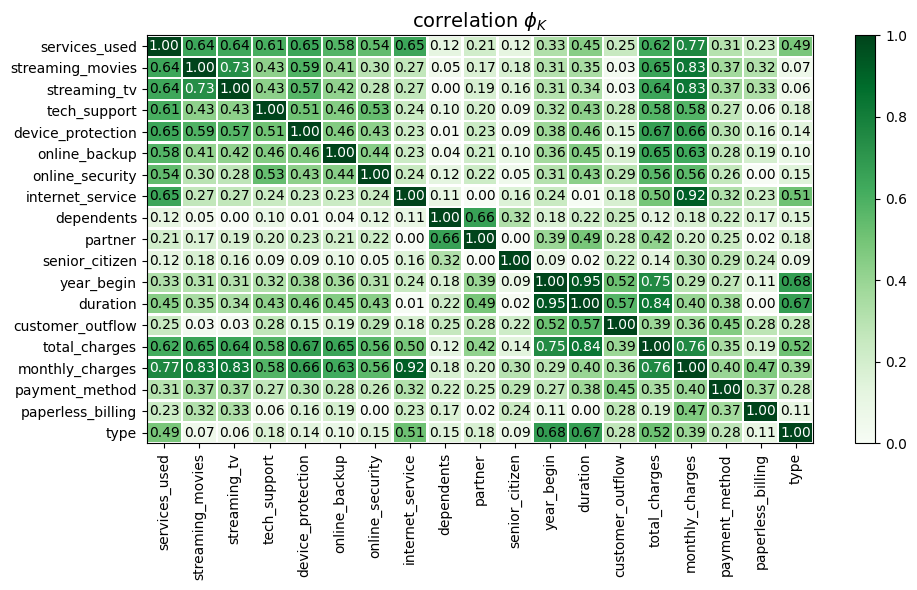

In [47]:
# Посмотрим на мультиколлиниарность между признаками и таргетом.

interval_cols = df.select_dtypes('number').columns.tolist()
phik_overview = df.phik_matrix(interval_cols=interval_cols)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 6))
plt.tight_layout()

<AxesSubplot:>

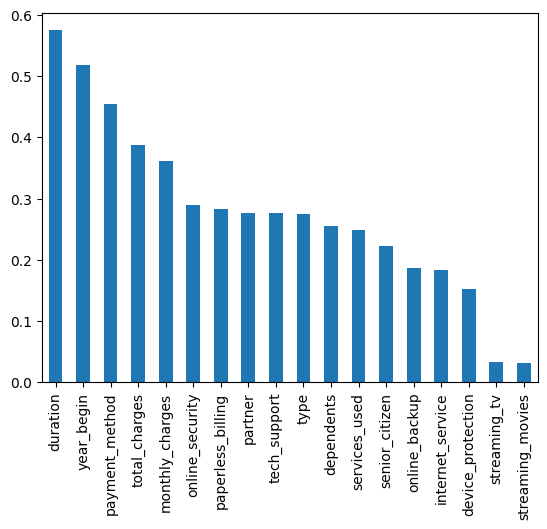

In [48]:
phik_overview['customer_outflow'].sort_values(ascending=False)[1:].plot(kind='bar')

Наблюдается сильная связь (более 0,9) признака monthly_charges с internet_service, сильная связь duration и year_begin.\
Чтобы не удалять данные признаки буду использовать модели на основе деревьев решений, где коллинеарность не имеет значения.

<div class="alert alert-success">
<h2> Комментарий тимлида<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отлично, все верно, действительно от мультиколинеарности важно избавляться для линейных моделей, для оставльных можно оставить и анализировать уже по значимости признаков после построения моделей.
        
На будущее, полезные ссылки - проверка важности признаков по модели это только один из способов (корреляция в том числе). Используют также аналитические методы проверки гипотез. 

Есть несколько инструментов для отбора признаков, подробнее можно посмотреть в данной статье (Отбор признаков в задачах машинного обучения): https://habr.com/ru/post/550978/

В библиотеке sklearn есть методы mutual_info_regression и mutual_info_classif соответственно для регрессии и классификации.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

Проверим важность оставшихся признаков в данных.

In [49]:
#Создаю копию , так как данные необходимо кодировать, а в дальнейшем будет использован pipeline
df_1 = df.copy()

In [50]:
df_1.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_outflow,duration,year_begin,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,services_used
0,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,2020,0,Yes,No,DSL,0,1,0,0,0,0,1
1,One year,No,Mailed check,56.95,1889.50,0,1036,2017,0,No,No,DSL,1,0,1,0,0,0,2
2,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,2019,0,No,No,DSL,1,1,0,0,0,0,2
3,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,2016,0,No,No,DSL,1,0,1,1,0,0,3
4,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,2019,0,No,No,Fiber optic,0,0,0,0,0,0,0


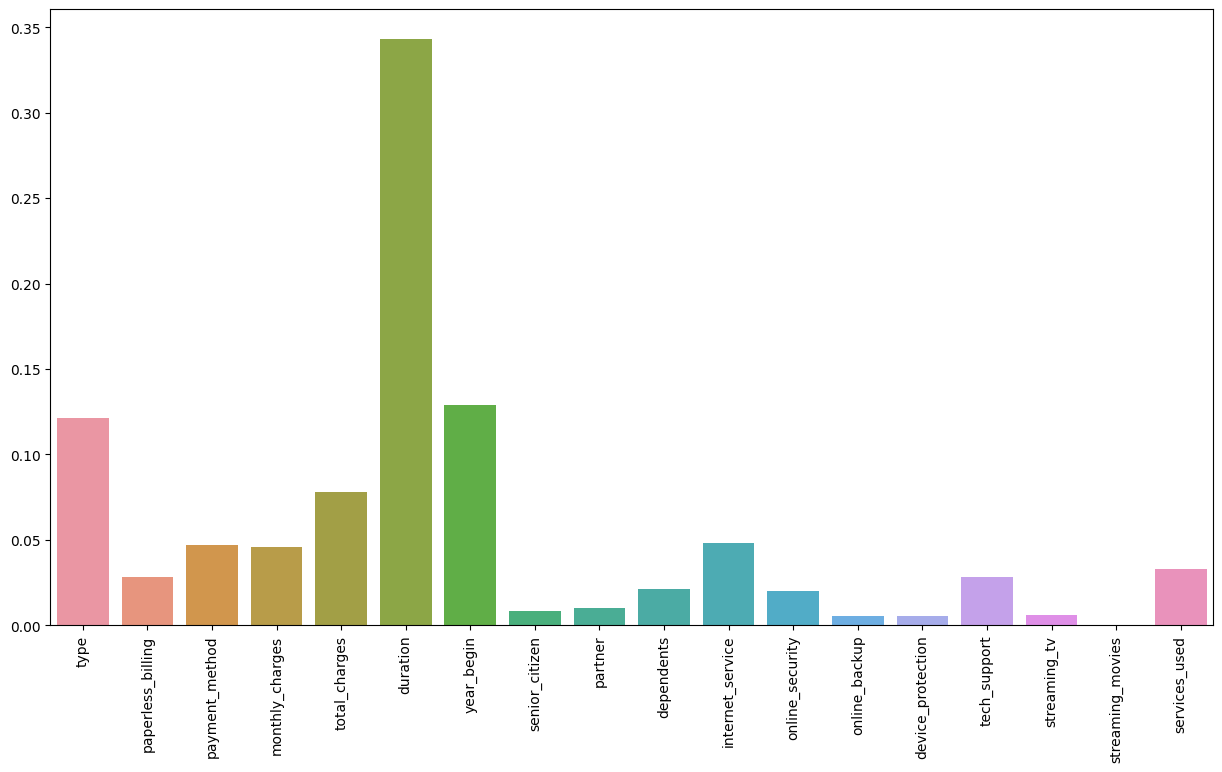

In [51]:
cat_columns = ['type','paperless_billing','payment_method','partner','dependents','internet_service']
df_1[cat_columns] = OrdinalEncoder().fit_transform(df_1[cat_columns])

num_columns = ['total_charges','monthly_charges','duration','year_begin']
df_1[num_columns] = StandardScaler().fit_transform(df_1[num_columns])

X = df_1.drop(columns='customer_outflow')
y = df_1['customer_outflow']
mi = mutual_info_classif(X,y, random_state=RANDOM_STATE)
plt.figure(figsize = (15,8))
ax = sns.barplot(x=X.columns.tolist(), y=mi)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()


Можем исключить признаки streaming_tv, streaming_movies, online_backup, device_protection

In [52]:
df.drop(['streaming_tv', 'streaming_movies', 'online_backup', 'device_protection'],axis=1,inplace=True)

<div class="alert alert-success">
<h2> Комментарий тимлида<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично! как раз то, о чем писала выше

## Исследование моделей

In [53]:
# Разобьем данные на обучающую и тестовую выборку с учетом дисбаланса

features_train, features_test, target_train, target_test = train_test_split(
    df.drop('customer_outflow', axis=1), df.customer_outflow, test_size=0.25, random_state=RANDOM_STATE,stratify=df['customer_outflow'])
print('Отношение целевого признака в обучающей выборке:',target_train.value_counts()[1]/target_train.value_counts()[0])
print('Отношение целевого признака в тестовой выборке:',target_test.value_counts()[1]/target_test.value_counts()[0])

Отношение целевого признака в обучающей выборке: 0.3229381443298969
Отношение целевого признака в тестовой выборке: 0.3230293663060278


In [54]:
features_train.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,duration,year_begin,senior_citizen,partner,dependents,internet_service,online_security,tech_support,services_used
3713,Month-to-month,Yes,Electronic check,80.40,3605.20,1401,2016,1,Yes,No,Fiber optic,0,0,1
3232,One year,No,Mailed check,53.65,1939.35,1095,2017,0,Yes,Yes,DSL,1,0,2
5669,One year,Yes,Bank transfer (automatic),100.55,4304.00,1310,2016,1,Yes,No,Fiber optic,0,0,4
3947,Month-to-month,No,Credit card (automatic),55.80,300.40,153,2019,0,No,No,DSL,1,0,2
2475,Two year,No,Mailed check,99.50,5424.25,1614,2015,0,No,No,Fiber optic,1,1,5


In [55]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5133 entries, 3713 to 1311
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               5133 non-null   object 
 1   paperless_billing  5133 non-null   object 
 2   payment_method     5133 non-null   object 
 3   monthly_charges    5133 non-null   float64
 4   total_charges      5133 non-null   float64
 5   duration           5133 non-null   int32  
 6   year_begin         5133 non-null   int64  
 7   senior_citizen     5133 non-null   int32  
 8   partner            5133 non-null   object 
 9   dependents         5133 non-null   object 
 10  internet_service   5133 non-null   object 
 11  online_security    5133 non-null   int32  
 12  tech_support       5133 non-null   int32  
 13  services_used      5133 non-null   int32  
dtypes: float64(2), int32(5), int64(1), object(6)
memory usage: 501.3+ KB


In [56]:
cat_col=['type','paperless_billing','payment_method','partner','dependents','internet_service']
num_col = ['monthly_charges','total_charges','duration','year_begin']

In [57]:
columns_pipeline=ColumnTransformer([('num_col', StandardScaler(), num_col),
                                   ('cat_col',OrdinalEncoder(), cat_col)],remainder='passthrough')
columns_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_col', StandardScaler(),
                                 ['monthly_charges', 'total_charges',
                                  'duration', 'year_begin']),
                                ('cat_col', OrdinalEncoder(),
                                 ['type', 'paperless_billing', 'payment_method',
                                  'partner', 'dependents',
                                  'internet_service'])])

In [58]:
#Создаем pipeline для моделей 

pipe_rf = Pipeline(
    [
        ("preproc", columns_pipeline),
        ("classif", RandomForestClassifier(random_state=RANDOM_STATE,class_weight='balanced')),
    ]
)

pipe_cb = Pipeline([ ("preproc", columns_pipeline),
                    ('classif', CatBoostClassifier(random_state=RANDOM_STATE))])

pipe_dm = Pipeline(
    [
        ("preproc", columns_pipeline),
        ("classif", DummyClassifier(random_state=RANDOM_STATE)),
    ]
)

In [59]:
#Параметры для поиска по сетке

grid_params_rf = [{
    'classif__criterion': ['gini', 'entropy'],
    'classif__max_depth':  [3, 10,50],
    'classif__min_samples_split': [2,5,10],
    'classif__n_estimators': [100, 300, 500]
}]


grid_params_cb = [{
    "classif__iterations": [20,100],
    "classif__learning_rate": [0.03,0.1,0.5],
    "classif__depth": [3,12,50],
    'classif__loss_function': ['Logloss', 'CrossEntropy']
        }]

grid_params_dm = [{
    "classif__strategy": ['most_frequent', 'prior', 'stratified']
        }]


<div class="alert alert-success">
<h2> Комментарий тимлида<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> плюс за использование пайплайнов, удобно и код выглядит оптимально

In [60]:
# GridSearchCV для каждой модели


RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='roc_auc',
            cv=10, 
            n_jobs=-1)


CB = GridSearchCV(estimator=pipe_cb,
            param_grid=grid_params_cb,
            scoring='roc_auc',
            cv=10,
            n_jobs=-1)

DM = GridSearchCV(estimator=pipe_dm,
            param_grid=grid_params_dm,
            scoring='roc_auc',
            cv=10) 

In [61]:
# Таблица для сведения результата
result = pd.DataFrame()
result['model'] = ['random_forest','catboost','dummy']

In [62]:
def grid (grid):
    grid.fit(features_train, target_train)
    print('best_params',grid.best_params_)
    print('roc_auc', grid.best_score_)
    return grid.best_score_


In [63]:
best_score_dm = grid(DM)

best_params {'classif__strategy': 'most_frequent'}
roc_auc 0.5


In [64]:
best_score_cb = grid(CB)

0:	learn: 0.5253940	total: 148ms	remaining: 14.6s
1:	learn: 0.4387090	total: 149ms	remaining: 7.31s
2:	learn: 0.3798984	total: 151ms	remaining: 4.87s
3:	learn: 0.3555255	total: 152ms	remaining: 3.64s
4:	learn: 0.3368662	total: 153ms	remaining: 2.91s
5:	learn: 0.3267535	total: 155ms	remaining: 2.42s
6:	learn: 0.3151635	total: 157ms	remaining: 2.08s
7:	learn: 0.3089847	total: 161ms	remaining: 1.85s
8:	learn: 0.3038583	total: 164ms	remaining: 1.66s
9:	learn: 0.3016195	total: 165ms	remaining: 1.49s
10:	learn: 0.2955885	total: 167ms	remaining: 1.35s
11:	learn: 0.2856085	total: 169ms	remaining: 1.24s
12:	learn: 0.2838969	total: 171ms	remaining: 1.15s
13:	learn: 0.2799857	total: 174ms	remaining: 1.07s
14:	learn: 0.2735772	total: 176ms	remaining: 997ms
15:	learn: 0.2723211	total: 178ms	remaining: 936ms
16:	learn: 0.2714302	total: 180ms	remaining: 879ms
17:	learn: 0.2656030	total: 184ms	remaining: 837ms
18:	learn: 0.2617439	total: 185ms	remaining: 788ms
19:	learn: 0.2581080	total: 186ms	remaini

In [65]:
best_score_rf = grid(RF)

best_params {'classif__criterion': 'entropy', 'classif__max_depth': 50, 'classif__min_samples_split': 10, 'classif__n_estimators': 500}
roc_auc 0.9324411552937326


In [66]:
result['best_score_roc_auc'] = [best_score_rf,best_score_cb,best_score_dm]

### Выбор лучшей модели

In [67]:
result.sort_values(by='best_score_roc_auc',ascending=False)

,model,best_score_roc_auc
1,catboost,0.969614
0,random_forest,0.932441
2,dummy,0.500000


<div class="alert alert-success">
<h2> Комментарий тимлида<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошие результаты, плюс за сводную таблицу

Лучший результат выдала модель **CatBoostClassifier('classif__depth': 3, 'classif__iterations': 100, 'classif__learning_rate': 0.5, 'classif__loss_function': 'Logloss',random_state=RANDOM_STATE)**

In [68]:
# Посмотрим на метрики этой модели на тестовом наборе данных
pred = CB.predict_proba(features_test)
probabilities_one = pred[:,1]
print('roc_auc на тестовой выборке',roc_auc_score(target_test, probabilities_one))

y_pred = CB.predict(features_test)
print('accuracy на тестовой выборке',accuracy_score(target_test, y_pred))
print('f1 на тестовой выборке',f1_score(target_test, y_pred))

roc_auc на тестовой выборке 0.9666421392810395
accuracy на тестовой выборке 0.9135514018691588
f1 на тестовой выборке 0.8077922077922078


Данные показатели говорят о том,что точность модели в предсказаниях составляет 91%

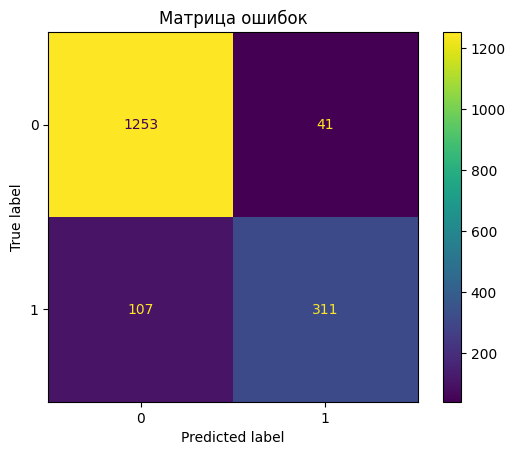

In [69]:

matrix = confusion_matrix(target_test,y_pred,labels=CB.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=CB.classes_)
disp.plot()
plt.title('Матрица ошибок')
plt.show()

311 раз модель правильно предсказала уход и 1253 раза,что клиенты останутся.\
107 раз ошиблась в том что клиенты не уйдут и 41 раз в том что уйдут.

<div class="alert alert-success">
<h2> Комментарий тимлида<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично, порог пройден

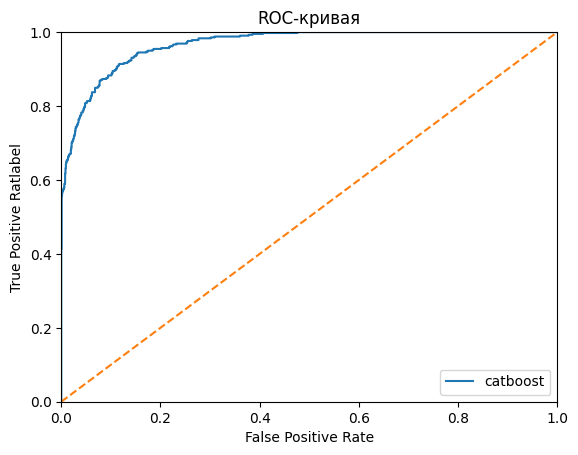

In [70]:
fpr1, tpr1, thresholds1 = roc_curve(target_test, probabilities_one)

plt.figure()

plt.plot(fpr1, tpr1,label='catboost')
# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.ylim([0, 1])
plt.xlim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Ratlabel')

plt.title('ROC-кривая')
plt.legend(loc=0)
plt.show()

ROC кривая расположена довольно высоко над линией случайной модели, соответственно имеет большую площадь под собой, что говорит о достаточно высокой точности модели.

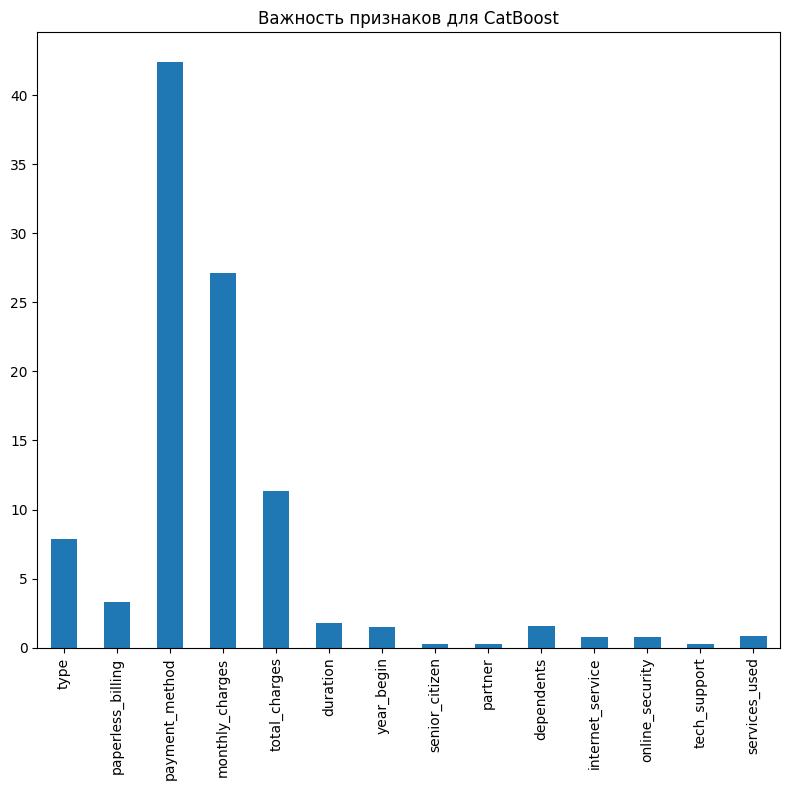

In [71]:
CB_important = pd.Series(CB.best_estimator_.named_steps.classif.get_feature_importance(),
                         df.drop(['customer_outflow'], axis=1).columns)
fig, ax = plt.subplots(figsize=(8,8))
CB_important.plot.bar(ax=ax)
ax.set_title("Важность признаков для CatBoost")
fig.tight_layout()

Наиболее важными для модели являются признаки payment_method, monthly_charges, total_charges, type.\
Наименьшую важность имеют senior_citizen, partner, tech_support	

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> добавь пожалуйста анализ значимости признаков, понять на основе чего модель строит прогнозы и нет ли утечки в данных, https://newtechaudit.ru/feature-importance-v-sklearn-i-catboost-na-primere-klassicheskih-datasetov/

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> добавила)
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> теперь отлично

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Владислава</b>, отличная работа и она почти готова,, мои комментарии ты увидишь выше.

Жду твою работу! :)

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>✔️ Заключение тимлида 2: <a class="tocSkip"> </h2> 
    
<b>Владислава</b>,  хорошо, доработки приняты, как и сам проект. По метрике отличный результат, порог пройден, поздравляю! Можно приступать к отчету.

## Отчет

1.  Относительно плана все пункты были выполнены, было внесено в него несколько изменений:
*  продолжительность договора рассчитана не в месяцах, а в днях, так метрика стала выше
*  пришлось отказаться от  LogisticRegression в исследованиях, поскольку эта модель линейная, а между признаками имеется сильная корреляция
*  был добавлен еще один признак год начала действия договора
2.  Трудности возникли с набором необходимой метрики, достигала 88, хороший прирост дало обнаружение выбросов в продолжительности договоров и их последующее удаление.
3.  Ключевые шаги в решении задачи: предобработка данных(замена пропусков,создание признаков, обнаружение выбросов),создание портрета уходящего клиента(полезно для бизнеса), определение мультиколлинеарности и важности призаков, и как следствие выбор определнных моделей для обучения.
4.  Итоговая модель CatBoostClassifier('classif__depth': 3, 'classif__iterations': 100, 'classif__learning_rate': 0.5, 'classif__loss_function': 'Logloss',random_state=RANDOM_STATE), где RANDOM_STATE=27032023


**Заказчиком** данного проекта является оперотор связи «Ниединогоразрыва.ком»

**Цель проекта заключалась :**  в построении модели, которая поможет предсказать уход клиента.
В случае предсказания ухода пользователя, ему будут предложены промокоды и специальные условия.

**Оператор предоставляет следующие услуги:**

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).
3. Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
4. Выделенная линия технической поддержки (*TechSupport*);
5. Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
6. Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

**Типы оплаты договора:**
1. оплата производится каждый месяц
2. заключить договор на 1–2 года

**Описание полей данных:**
- BeginDate – дата начала пользования услугами,
- EndDate – дата окончания пользования услугами,
- Type – тип договора: ежемесячный, годовой и т.д,
- PaperlessBilling – факт выставления счёта на электронную почту,
- PaymentMethod – способ оплаты,
- MonthlyCharges – ежемесячные траты на услуги,
- TotalCharges – всего потрачено денег на услуги,
- Dependents – наличие иждивенцев,
- Senior Citizen – наличие пенсионного статуса по возрасту,
- Partner – наличие супруга(и),
- MultipleLines – наличие возможности ведения параллельных линий во время звонка.

**Информация о договорах актуальна на 1 февраля 2020**






Предоставлено 4 таблицы данных, которые были объеденины в единый датафрейм.

Перед объединением была проведена следующая предобработка:

В таблице **contract:**
*  названия колонок переведени в единый формат snake_case;
*  из колонки end_date выведен целевой признак duration;
*  в end_date заменены значения No на числовые,а в total_charges пропуски состоящие из пустых строк(' ') ,прировняли к ежемесячному платежу, поскольку в них дата заключения договора совпадает с датой выгрузки данных. Клиенты только пришли,вероятно их платеж не попал в базу;
*  произвели сменту типов данных и добавили два новых признака year_begin и year_end;
*  удалили более не используемы признаки 'begin_date','end_date'.

В таблице **internet:**
*  значения Yes и No во всех колонках заменены на  1 и 0 соответственно;
*  создан новый признак services_used, означающий общее количество используемых дополнительных опций у каждого пользователя интернета.

После объединения таблиц образовались пропуски,в результате присоединения таблиц internet и phone, где число строк было меньше ,так как не все пользователи пользуются одновременно услугами интернет и телефония.Заменили их в internet_service на 'not used',соответственно в services_used и в дополнительных услугах число используемых доп.опций будет равно 0.
В multiple_lines заменили так же на 'not used'.
 
**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


**В ходе исследования** было обнаружено,что заключение договоров в данных начинается с 2013 года, а первые отключения начинаются только в 2019 году.
Резкий скачок по увеличению клиентов был сначала в 2014 году, после чего до 2018 года держался практически на одном уровне.
С 2018 начинается приток клиентов и пик приходится на 2019 год. Так же на 2019 год приходится и пик расторжения договоров.
Большее число подключений и отключений пришлось на оптоволокно.

Повышения цен не было, начиная с 2013 года стоимость услуг снижалась.Дороже всего клиентам обходится подключение на оптоволокно, услуги на DSL стоят гораздо дешевле.Ну и клиенты, использующие только телефонию платят меньше всех.

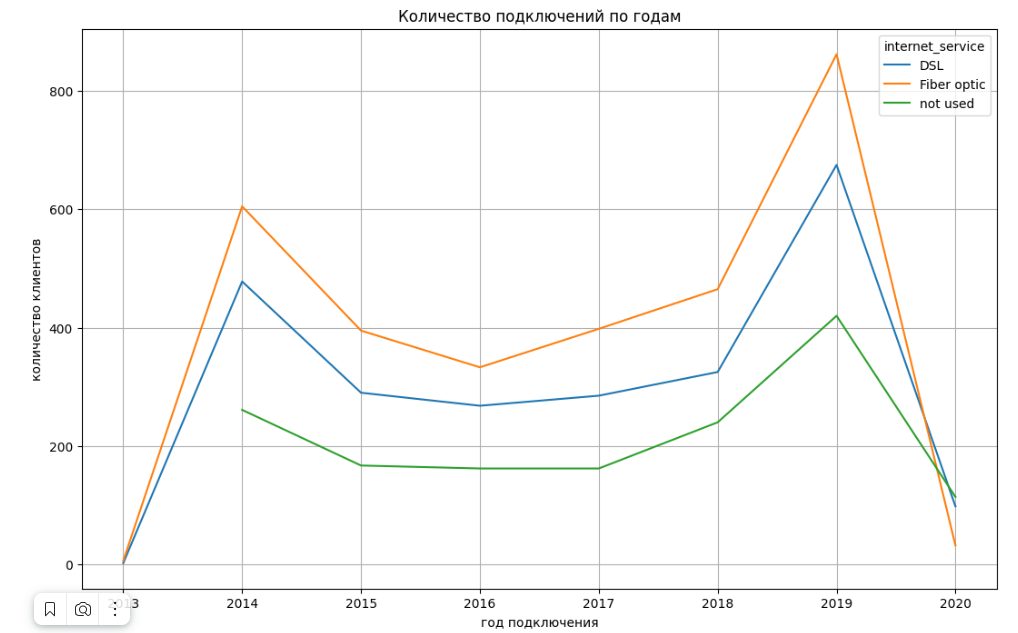
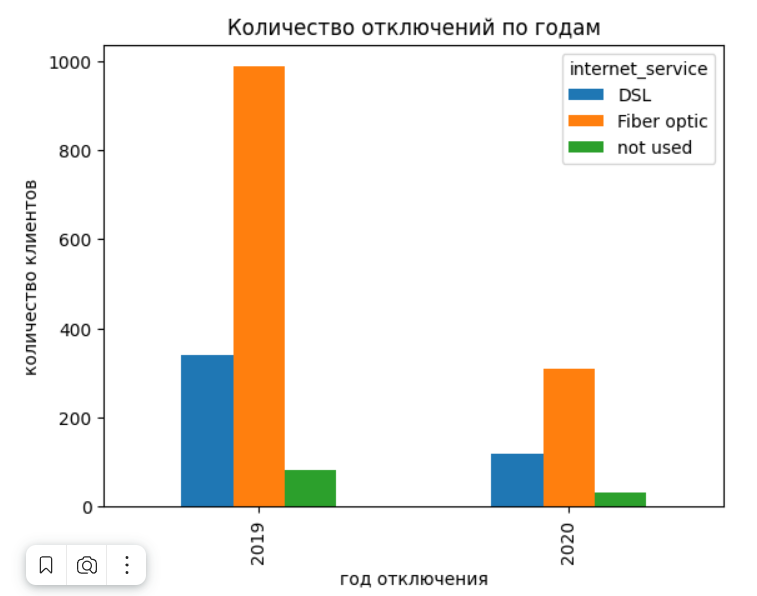
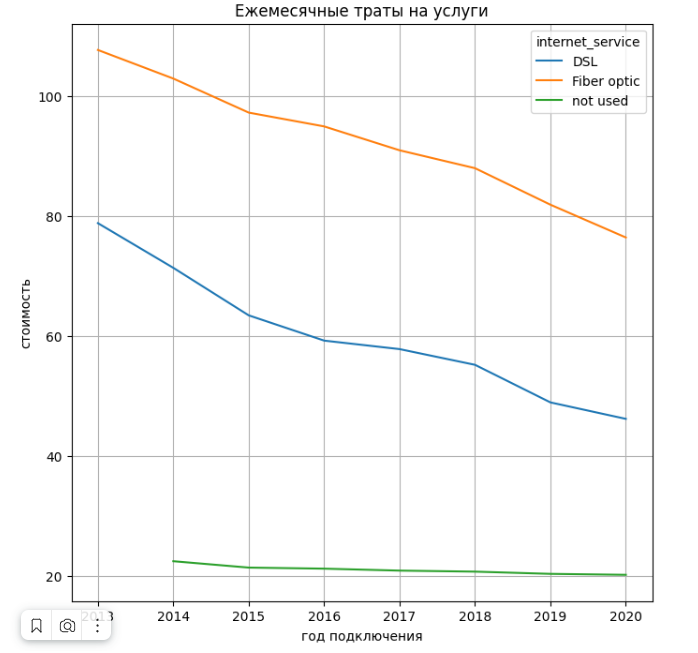


В продолжительности действия договоров были обнаружены выбросы, вероятно связанные с тем,что с 2013 по 2019 год не было ни одного отключения. Из данных были исключены договора длительностью более 1500 дней,которые уже расторгнуты.

Клиенты с помесячным типом оплаты расторгают договор, чаще чем с договором на 1-2 года.При чем клиенты,которым приходил счет на электронную почту делают это чаще, чем те кому счет не выставляют по почте.\
Так же клиенты, платившие за месяц более 65 у.е., за год-два более 100 у.е. уходят чаще.Что логично, уходят те,кто тратит много.

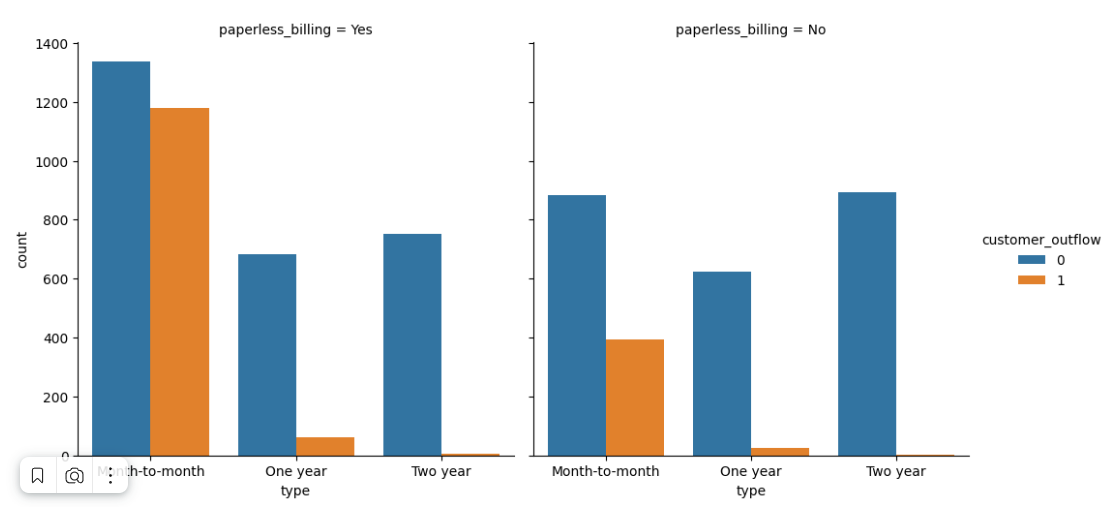

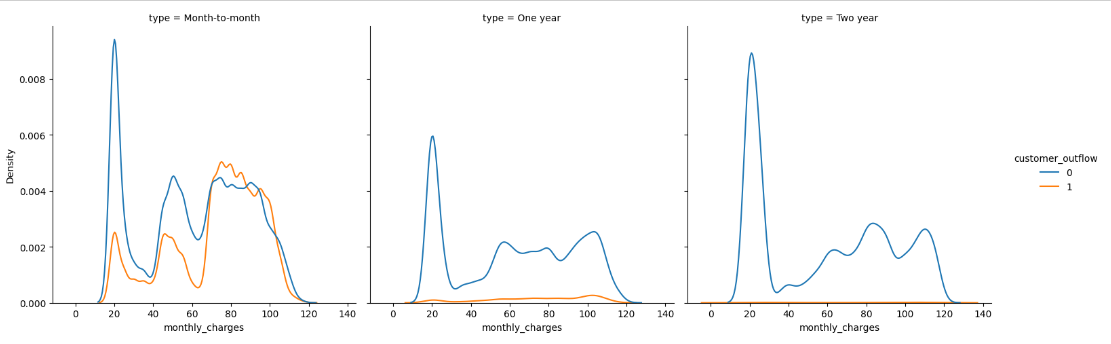


Число ушедших клиентов с помесячной оплатой и электронным чеком превышает число действующих клиентов с такой же формой оплаты. В остальном так же прослеживается тенденция того,что независомо от способа оплаты клиенты с месячной формой платежей уходят чаще.

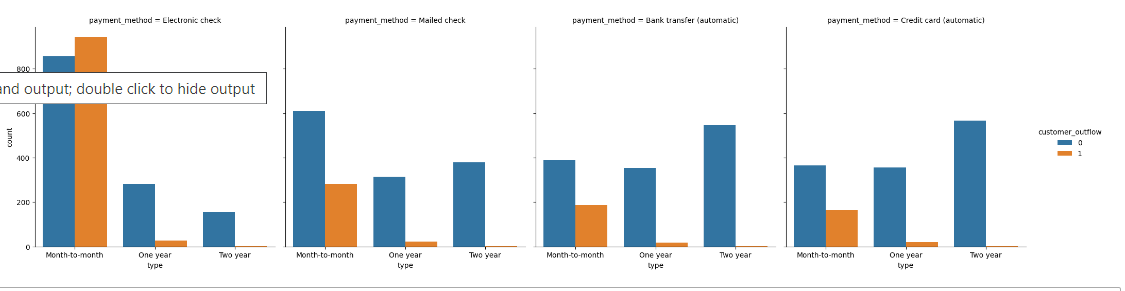

Чем выше общая сумма платежей, тем меньше ушедших клиентов, что связано видимо с типом оплаты 1-2 года,большая часть клиентов уходит в общем заплатив сумму в диапазоне 400-500 у.е.,вероятно это как раз клиенты с месячной формой оплаты.

Чаще уходят клиенты, пользующиеся услугами в пределах 5-6 месяцев.

Клиенты без детей и без супруга уходят чаще остальных.

Клиенты, использующие подключение через оптоволокно,намного чаще покидают компанию, в отличие от использующих DSL.Вероятно это связано с тем, что услуги на оптоволокне дороже и видимо качество не лучшее.
Клиенты не использующие интернет предпочитают оставаться клиентами компании.
Среди клиентов DSL довольно часто уходят не использующие дополнительные услугисвообще или использующие 1 услугу.
А клиенты на оптоволокне только в случае подключения 5-6 дополнительных опций остаются в компании.В остальных случаях чаще покидают.Что странно поскольку подключение DSL это прошлый век, вероятно у компании проблемы с оптоволокном.

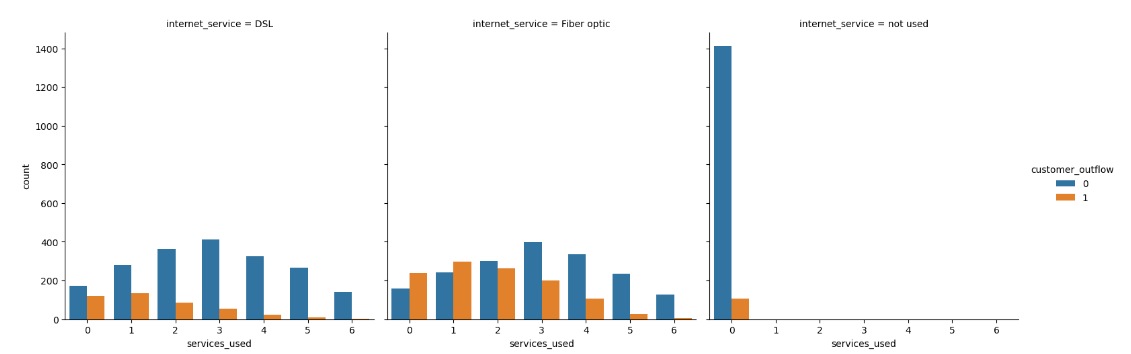

Возможность ведения параллельных линий во время звонка не сильно влияет на решение об уходе.

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


**ПОРТРЕТ УХОДЯЩЕГО КЛИЕНТА:**
*  Без супруга(и) и без детей
*  Использует подключение Fiber optic (оптоволокно)
*  Тип контракта month-to-month с ежемесячной стоимостью более 65 у.е.
*  Выставление счета на электронную почту с электронным чеком
*  Договор заключен 5-6 месяцев назад
*  Количество дополнительных интернет услуг 0-3

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

С помощью мультикорреляции была обнаружена сильная связь (более 0,9) признака monthly_charges с internet_service, сильная связь duration и year_begin.\
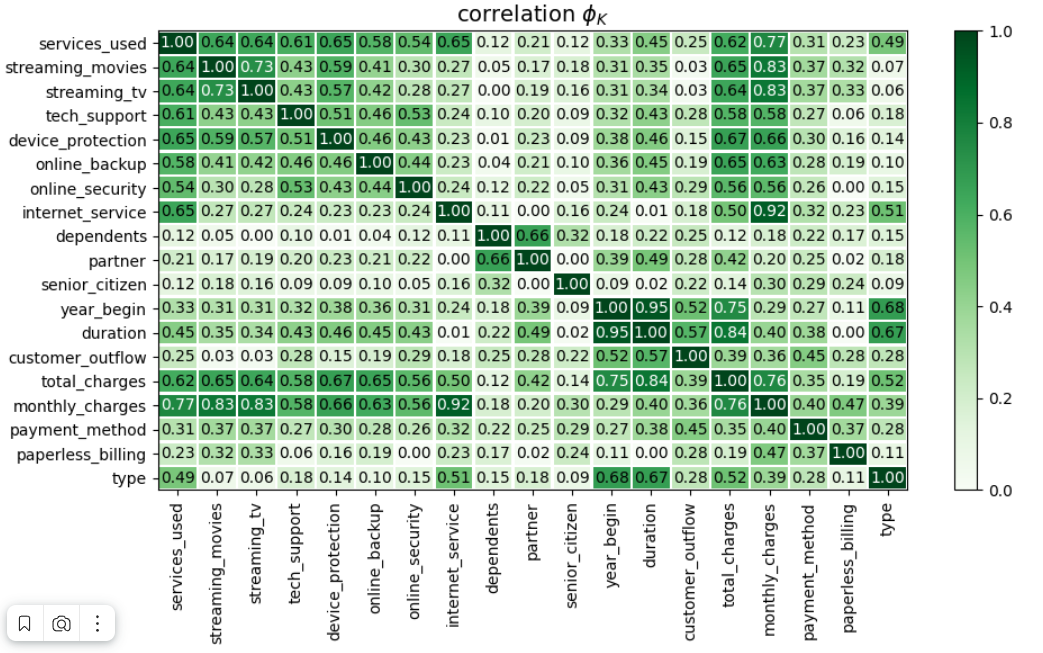

Для сохранения данных было решено использовать модели на основе деревьев решений, где коллинеарность не имеет значения.

Была определена важность каждого признака.
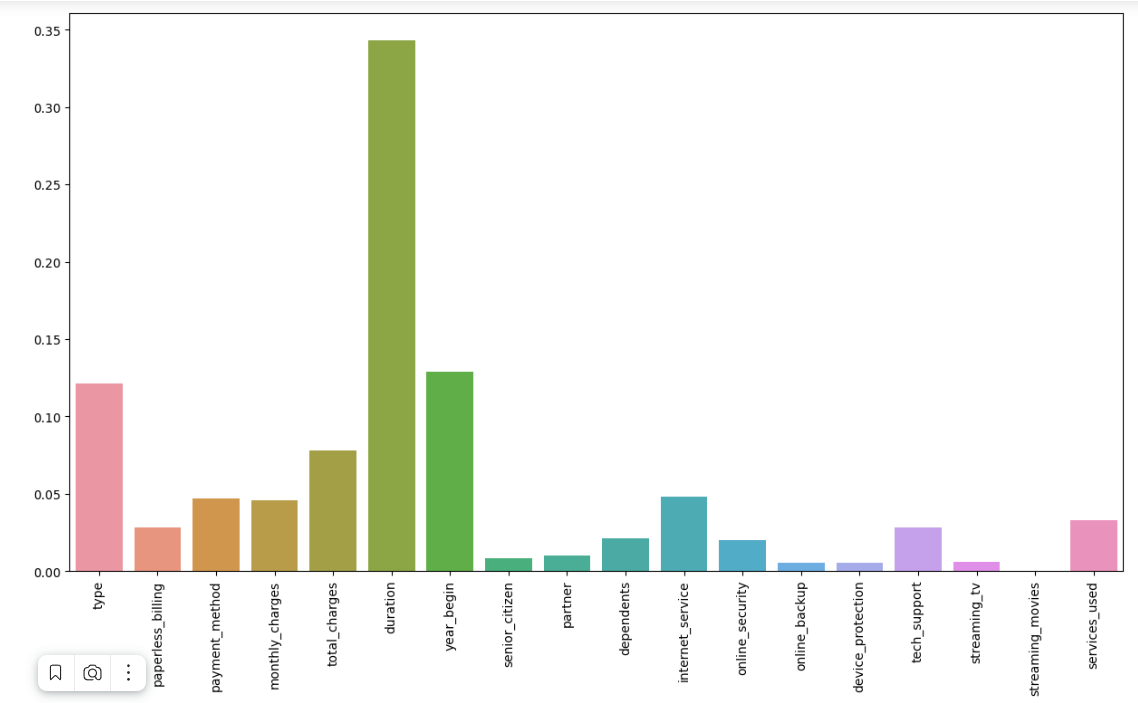

В результате исключили признаки streaming_tv, streaming_movies, online_backup, device_protection


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Данные были разделены на тренировочный и тестовый набор в отношении 3/1

Исследовали 3 модели: **random_forest,catboost и dummy**
Выбрана **метрика roc_auc** поскольку в данных наблюдается дисбаланс классов, а она не чувствительна к нему.

Получили следующие результаты:
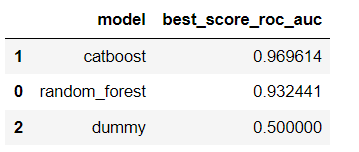

Лучший результат выдала **модель CatBoostClassifier('classif__depth': 3, 'classif__iterations': 100, 'classif__learning_rate': 0.5, 'classif__loss_function': 'Logloss',random_state=RANDOM_STATE), где RANDOM_STATE=27032023**

Тестирование лучшей модели показало следующие результаты:
*  **roc_auc** на тестовой выборке 0.9666421392810395
*  **accuracy** на тестовой выборке 0.9135514018691588
*  **f1**  на тестовой выборке 0.8077922077922078


Данные показатели говорят о том,что точность модели в предсказаниях составляет 91%

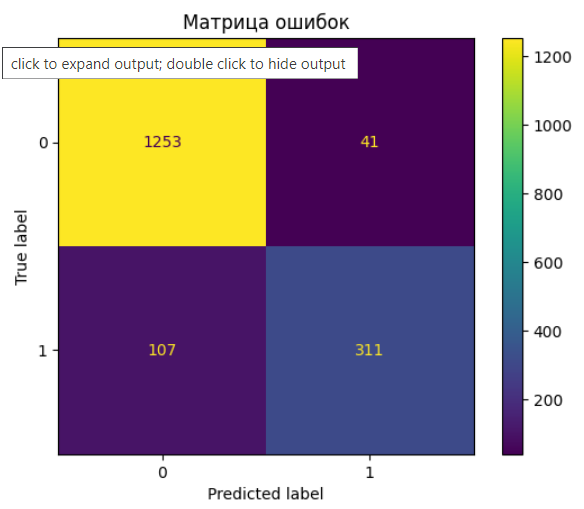

311 раз модель правильно предсказала уход и 1253 раза,что клиенты останутся. Итого 1564 верных ответа.\
107 раз ошиблась в том что клиенты не уйдут и 41 раз в том что уйдут. Итого 148 раз ошиблась.

Для выбранной модели наиболее важными оказались признаки payment_method, monthly_charges, total_charges, type.\
Наименьшую важность имеют senior_citizen, partner, tech_support. 

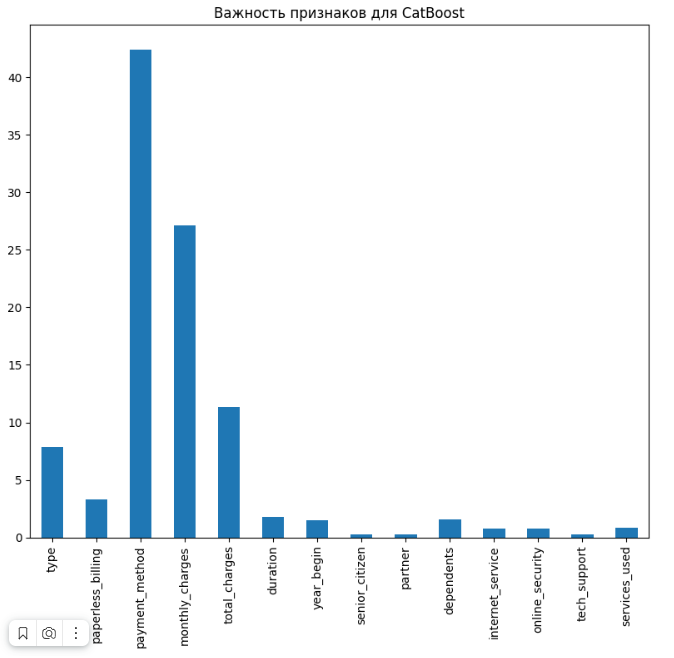


<div style="border:solid Chocolate 2px; padding: 40px">

<h2>✔️ Финальное заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Владислава</b>, с отчетом все хорошо! Работа получилась большой и полной, молодец! 
    
Поздравляю с получением диплома о новой специальности!!!!<br> 
    
Немного фидбека о твоей работе:
- доработки не только ошибок, но и рекомендации, что отражает качественный подход к работе;
- легкочитаемый код - он понятен, с пояснениями и отступами, молодец;
- использование пайплайнов, кросс-валидации и нескольких моделей обучения - супер;
- отличная аналитическая часть.
    
Рекомендую разобраться с использованием пайплайнов, с ними легко предотвратить косвенную утечку данных. Тут можешь посмотреть <a href='https://habr.com/ru/company/ods/blog/322534/'>пример работы с ним</a>, а <a href='https://newtechaudit.ru/pipeline-v-rabote-s-dannymi/'>тут</a> почитать про пайплайны, <a href='https://scikit-learn.ru/6-1-pipelines-and-composite-estimators/'>адаптация официального руководства sklearn</a>.
    
Сейчас ты можешь доработать этот проект с учетом рекомендаций, удалить наши с тобой комментарии и добавить себе в портфолио — лучше это сделать в ближайшее время, пока все нюансы еще отложились в памяти.

Далее, хочу добавить некоторые ссылки на полезные ресурсы по машинному обучению:

https://academy.yandex.ru/handbook/ml/ онлайн-учебник от Школы анализа данных Яндекса, в котором описаны теоретические основы работы моделей машинного обучения;

https://www.youtube.com/watch?v=xl1fwCza9C8 познавательное видео по настройке модели CatBoost

https://habr.com/ru/company/ods/blog/322626/ на Habr можно закрепить свои знания, порешав задачи из цикла статей — Открытый курс машинного обучения

https://github.com/esokolov/ml-course-hse — на гитхаб есть репозиторий с задачами из курса по машинному обучению от Евгения Соколова, можно использовать как дополнительный материал для закрепления знаний.

https://habr.com/ru/company/avito/blog/571094/ — материалы по A/B тестам.

В некоторых компаниях при устройстве на работу или стажировку, например в Яндексе, нужно решить тест на алгоритмические задачи. По алгоритмам есть много разных курсов, платных и бесплатных. Можно попробовать Тренировки по Алгоритмам от Яндекса https://yandex.ru/yaintern/algorithm-training (бесплатно, хороший курс). Насколько знаю, у Практикума тоже есть курс по алгоритмам.
    
***
    
После окончания финального спринта у нас будет заключительная консультация, где мы сможем подвести итоги и обсудить несколько проектов. Есть возможность выступить перед сокурсиниками со своим проектам в zoom, напиши мне об этом в Пачку, если есть желание :)
    
Отчет принимаю и до встречи!
    
    
</font>